In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def radius_of_curvature(coor, value):
    d1 = (value[1:] - value[:-1]) / (coor[1] - coor[0])
    d2 = (d1[1:] - d1[:-1]) / (coor[1] - coor[0])
    R = np.power(1 + d1[1:] ** 2, 1.5) / np.abs(d2)
    return R


def yag_position(D, y0, theta0, theta):
    return (D - L0 / 2. * np.cos(theta0 + theta) + y0 * np.sin(theta0 + theta)) * np.tan(2 * (theta0 + theta))

# Optimize the mirrors angle and position

## M3

The mirror YAG distance is 119.29 mm
The mirror 0 degree angle offset is -0.00901 deg
The uncertainty in the angle is 0.00041 deg


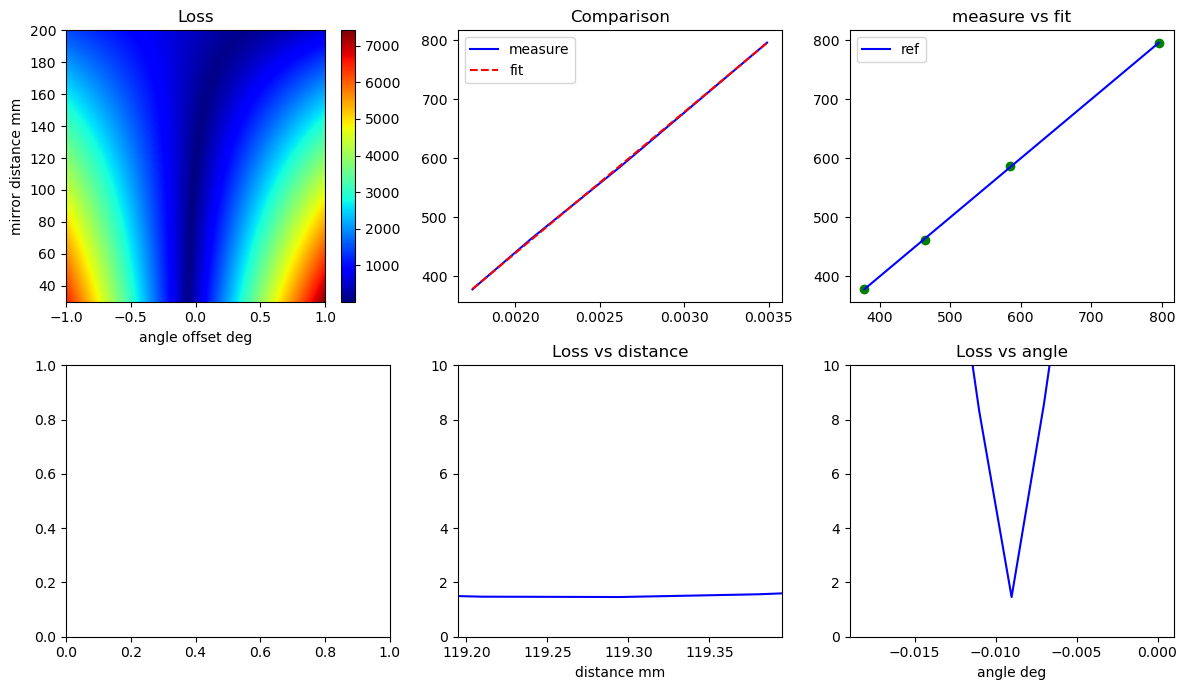

In [43]:
data = np.array([[-(1218 - 1509) * 6.5 / 5, np.deg2rad(0.1)],  #(Li  um, thetai  rad)
                 [-(1152 - 1509) * 6.5 / 5, np.deg2rad(0.12)],
                 [-(1059 - 1509) * 6.5 / 5, np.deg2rad(0.15)],
                 [-(897 - 1509) * 6.5 / 5, np.deg2rad(0.2)],
                 ])

L0 = 0e3  # mirror length
y0 = 0.0
angle_offset_array = np.deg2rad(np.linspace(-1, 1, num=1000))
distance_array = np.linspace(start=30e3, stop=200e3, num=2000)


def get_loss_map(D_array=distance_array, theta0_array=angle_offset_array, y0=y0):
    loss_holder = np.zeros((D_array.shape[0], theta0_array.shape[0]))
    for entry in data:
        angles = theta0_array[np.newaxis, :] + entry[1]
        tmp = (D_array[:, np.newaxis] - L0 / 2 * np.cos(angles) + y0 * np.sin(angles)) * np.tan(2 * angles)
        loss_holder += np.square(entry[0] - tmp)
    loss_holder /= float(data.shape[0])
    loss_holder = np.sqrt(loss_holder)
    return loss_holder

loss_map = get_loss_map(D_array=distance_array, theta0_array=angle_offset_array, y0=0.0)
idxes = np.unravel_index(loss_map.argmin(), loss_map.shape)

optimal_distance = distance_array[idxes[0]]
optimal_angle = angle_offset_array[idxes[1]]

loss_min = loss_map[idxes[0], idxes[1]]
angle_uncertainty = (angle_offset_array[1] - angle_offset_array[0])
angle_uncertainty /= (loss_map[idxes[0], idxes[1] + 1] - loss_map[idxes[0], idxes[1]])
angle_uncertainty *= (loss_map[idxes[0], idxes[1]] )

print("The mirror YAG distance is {:.2f} mm".format(optimal_distance / 1e3))
print("The mirror 0 degree angle offset is {:.5f} deg".format(np.rad2deg(optimal_angle)))
print("The uncertainty in the angle is {:.5f} deg".format(np.rad2deg(angle_uncertainty)))
# Visualization
fig, axes = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(7)
fig.set_figwidth(12)

im = axes[0,0].imshow(loss_map, cmap='jet', aspect='auto',
           extent=[np.rad2deg(angle_offset_array[0]),
                   np.rad2deg(angle_offset_array[-1]),
                   distance_array[0] / 1e3,
                   distance_array[-1] / 1e3])
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Loss")
axes[0,0].set_xlabel("angle offset deg")
axes[0,0].set_ylabel("mirror distance mm")

axes[0,1].plot(data[:, 1], data[:, 0], label='measure', color='b')
axes[0,1].plot(data[:, 1], yag_position(optimal_distance, y0, optimal_angle, data[:, 1]), label='fit', color='r', linestyle='--')
axes[0,1].set_title("Comparison")
axes[0,1].legend()

axes[0,2].scatter(data[:, 0], yag_position(optimal_distance, y0, optimal_angle, data[:, 1]), color='g')
axes[0,2].plot(data[:, 0], data[:, 0], label='ref', color='b')
axes[0,2].set_title("measure vs fit")
axes[0,2].legend()

axes[1,1].plot(distance_array / 1e3, loss_map[:,idxes[1]], color='b')
axes[1,1].set_title("Loss vs distance")
axes[1,1].set_xlabel("distance mm")
axes[1,1].set_xlim([optimal_distance / 1e3 - 0.1, optimal_distance / 1e3 + 0.1])
axes[1,1].set_ylim([0,10])

axes[1,2].plot(np.rad2deg(angle_offset_array), loss_map[idxes[0],:], color='b')
axes[1,2].set_title("Loss vs angle")
axes[1,2].set_xlabel("angle deg")
axes[1,2].set_xlim([np.rad2deg(optimal_angle) - 0.01, np.rad2deg(optimal_angle) + 0.01])
axes[1,2].set_ylim([0,10])

plt.tight_layout()
plt.show()

## M2

The mirror YAG distance is 110.28 mm
The mirror 0 degree angle offset is -0.02102 deg
The uncertainty in the angle is 0.00158 deg


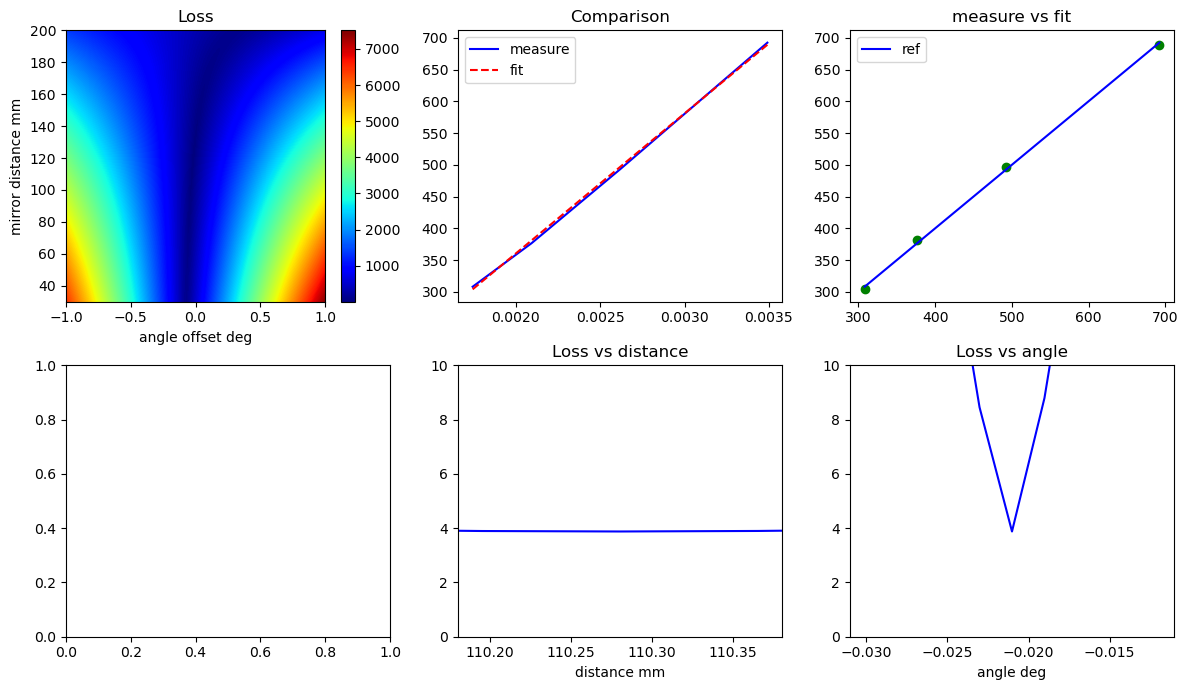

In [45]:
data = np.array([[(654 - 417) * 6.5 / 5, np.deg2rad(0.1)], #(Li  um, thetai  rad)
                 [(706.7 - 417) * 6.5 / 5, np.deg2rad(0.12)],
                 [(796.1 - 417) * 6.5 / 5, np.deg2rad(0.15)],
                 [(949.5 - 417) * 6.5 / 5, np.deg2rad(0.2)],
                ])

L0 = 0e3  # mirror length
y0 = 0.0
angle_offset_array = np.deg2rad(np.linspace(-1, 1, num=1000))
distance_array = np.linspace(start=30e3, stop=200e3, num=2000)


def get_loss_map(D_array=distance_array, theta0_array=angle_offset_array, y0=y0):
    loss_holder = np.zeros((D_array.shape[0], theta0_array.shape[0]))
    for entry in data:
        angles = theta0_array[np.newaxis, :] + entry[1]
        tmp = (D_array[:, np.newaxis] - L0 / 2 * np.cos(angles) + y0 * np.sin(angles)) * np.tan(2 * angles)
        loss_holder += np.square(entry[0] - tmp)
    loss_holder /= float(data.shape[0])
    loss_holder = np.sqrt(loss_holder)
    return loss_holder

loss_map = get_loss_map(D_array=distance_array, theta0_array=angle_offset_array, y0=0.0)
idxes = np.unravel_index(loss_map.argmin(), loss_map.shape)

optimal_distance = distance_array[idxes[0]]
optimal_angle = angle_offset_array[idxes[1]]

loss_min = loss_map[idxes[0], idxes[1]]
angle_uncertainty = (angle_offset_array[1] - angle_offset_array[0])
angle_uncertainty /= (loss_map[idxes[0], idxes[1] + 1] - loss_map[idxes[0], idxes[1]])
angle_uncertainty *= (loss_map[idxes[0], idxes[1]] )

print("The mirror YAG distance is {:.2f} mm".format(optimal_distance / 1e3))
print("The mirror 0 degree angle offset is {:.5f} deg".format(np.rad2deg(optimal_angle)))
print("The uncertainty in the angle is {:.5f} deg".format(np.rad2deg(angle_uncertainty)))
# Visualization
fig, axes = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(7)
fig.set_figwidth(12)

im = axes[0,0].imshow(loss_map, cmap='jet', aspect='auto',
           extent=[np.rad2deg(angle_offset_array[0]),
                   np.rad2deg(angle_offset_array[-1]),
                   distance_array[0] / 1e3,
                   distance_array[-1] / 1e3])
fig.colorbar(im, ax=axes[0,0])
axes[0,0].set_title("Loss")
axes[0,0].set_xlabel("angle offset deg")
axes[0,0].set_ylabel("mirror distance mm")

axes[0,1].plot(data[:, 1], data[:, 0], label='measure', color='b')
axes[0,1].plot(data[:, 1], yag_position(optimal_distance, y0, optimal_angle, data[:, 1]), label='fit', color='r', linestyle='--')
axes[0,1].set_title("Comparison")
axes[0,1].legend()

axes[0,2].scatter(data[:, 0], yag_position(optimal_distance, y0, optimal_angle, data[:, 1]), color='g')
axes[0,2].plot(data[:, 0], data[:, 0], label='ref', color='b')
axes[0,2].set_title("measure vs fit")
axes[0,2].legend()

axes[1,1].plot(distance_array / 1e3, loss_map[:,idxes[1]], color='b')
axes[1,1].set_title("Loss vs distance")
axes[1,1].set_xlabel("distance mm")
axes[1,1].set_xlim([optimal_distance / 1e3 - 0.1, optimal_distance / 1e3 + 0.1])
axes[1,1].set_ylim([0,10])

axes[1,2].plot(np.rad2deg(angle_offset_array), loss_map[idxes[0],:], color='b')
axes[1,2].set_title("Loss vs angle")
axes[1,2].set_xlabel("angle deg")
axes[1,2].set_xlim([np.rad2deg(optimal_angle) - 0.01, np.rad2deg(optimal_angle) + 0.01])
axes[1,2].set_ylim([0,10])

plt.tight_layout()
plt.show()